In [1]:
#"Decomment for install"
#!pip install kmeans
#!pip install seaborn

In [2]:
#Modules to install via pip pandas,ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pprint import pprint
import os
import import_ipynb
import sys
import kmeans
sys.path.append('../')
from functions import *
from pandas.plotting import scatter_matrix
import cmath as math
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
# scipy
from scipy.cluster.vq import kmeans,vq,whiten
import sklearn.metrics as sm
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline
import random
random.seed(6666)

#Experiment with 9 Nodes from Cooja

In [3]:

dataList=coojaJsonImporter("../cooja-9nodes/traces")
data=[]
cases=[
      "BH1",
        "BH2",
    "normal"
      ]
BlackHole=[-1,4,5+8]
for nodeList in dataList:
    data.append(createNodes(nodeList))
pings=getPings(data)
#All data collection is in variable node that is a list of list of nodes
#3 nets input x 9 nodes by net

d={ "label":[],
    "count":[],
    "std":  [],
    "mean": [],
    "var":  [],
    "25%":  [],
   "50%":[],
   "75%":[],
   "min":[],
   "max":[],
   "hop":[],
   "missing": []
   #"rtt/pkt":[]
}
count=[]
labels=[]
var=[]
#window=100
#stats=pd.DataFrame(columns=columns)
rows=[count,labels]
for i in range(len(data)):
    window=pings[i]
    
    for j in range(len(data[i])):
            #df1 = df1.assign(e=p.Series(np.random.randn(sLength)).values)
            node=data[i][j].pkts
            name=str(j)+" "+cases[i]
            nodeWindow=node["rtt"]
            #current=data[i][j].pkts['rtt'][z:z+window]
            #print(nodeWindow.shape)
            d["count"].append(nodeWindow.count())
            d["std"].append(nodeWindow.std())
            d["mean"].append(nodeWindow.mean())
            d["var"].append(nodeWindow.var())
            d["label"].append(cases[i])
            d["25%"].append(nodeWindow.describe()["25%"])
            d["50%"].append(nodeWindow.describe()["50%"])
            d["75%"].append(nodeWindow.describe()["75%"])
            d["min"].append(nodeWindow.describe()["min"])
            d["max"].append(nodeWindow.describe()["max"])
            d["hop"].append(data[i][j].hop)
            
            missing=window-nodeWindow.count()
            d["missing"].append(missing)

            
            
stats=pd.DataFrame(d)            

stats
correction=[]
correction2=[] #for 3 cluster 0:normal net 1:bh net 2:bh

#Creating simple array to correct unsupervised learning
#NB as it is unsupervised could happen that the correction are inverted
for i in range(len(d["label"])):
    el=d["label"][i]
    if el=="normal":
        correction.append(1)
        correction2.append(1)
        
    else:
        #print(el=="BH2" and i==BlackHole[2])
        correction.append(0)
        if ((el=="BH1" and i==BlackHole[1]) or
            (el=="BH2" and i==BlackHole[2])):
            
            correction2.append(2)
        else:
            correction2.append(0)
        

correction=np.array(correction)
correction2=np.array(correction2)

stats

Importing test_1BH_2018-11-09_12_31_25.json
Importing test_1BH_2018-11-09_14_37_46.json
Importing test_nom_2018-11-09_08_55_11.json


,label,count,std,mean,var,25%,50%,75%,min,max,hop,missing
0,BH1,98,1403.775442,1868.816327,1.970585e+06,1035.75,1404.5,1883.75,498.0,8170.0,1,1
1,BH1,99,1812.662114,2139.282828,3.285744e+06,1094.00,1430.0,2435.50,615.0,9112.0,1,0
2,BH1,91,1873.889033,3916.604396,3.511460e+06,2471.00,3067.0,4722.00,1236.0,9972.0,2,8
3,BH1,97,1308.893667,1815.742268,1.713203e+06,1035.00,1313.0,2029.00,258.0,6985.0,1,2
4,BH1,25,2220.932875,4667.000000,4.932543e+06,3024.00,3943.0,6051.00,2004.0,9803.0,3,74
5,BH1,20,1692.746764,4806.350000,2.865392e+06,3586.25,4811.5,5355.00,2145.0,7972.0,3,79
6,BH1,92,1942.511168,3667.793478,3.773350e+06,2209.00,2908.0,4660.75,945.0,9164.0,2,7
7,BH1,13,1707.433281,5039.076923,2.915328e+06,3777.00,4753.0,5898.00,2896.0,8165.0,3,86
8,BH1,88,1836.716617,3821.000000,3.373528e+06,2351.00,3198.5,4832.75,1533.0,8961.0,2,11
9,BH2,95,1254.483776,1812.136842,1.573730e+06,1114.50,1293.0,2048.00,255.0,6935.0,1,2


In [4]:

data=stats.drop(["label","25%","var","mean","75%","50%","min","max"],axis=1)

dataC=stats["label"]

#Y = data[['var']]
#X = data[['std']]



Kmeans with 2 clusters, using just count, mean and hop feature we can get 100% of understanding probability of the node of being part of a Black Hole Network or not


In [5]:
data.head()

,count,std,hop,missing
0,98,1403.775442,1,1
1,99,1812.662114,1,0
2,91,1873.889033,2,8
3,97,1308.893667,1,2
4,25,2220.932875,3,74


In [6]:

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_


print(labels)
print(correction)

# Performance Metrics
accuracy=sm.accuracy_score(correction, labels)

# Confusion Matrix
confusionMatrix=sm.confusion_matrix(correction, labels)

print(accuracy)
print(confusionMatrix)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
1.0
[[18  0]
 [ 0  9]]


As expected the Elbow curve tell us that we would have a high percentage of success using 2 or more clusters, as we are trying to find out if a network is Black Hole or not we just need two

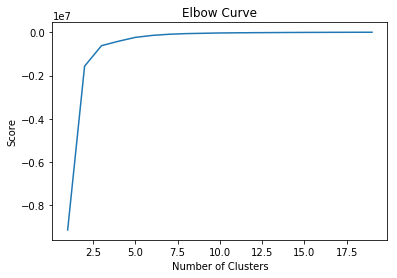

In [7]:
Y=data
Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()


Using more data is probably counterproductive, but let's try 

In [8]:
dataplus=stats.drop(["label"],axis=1)
data=dataplus
data.head()

,count,std,mean,var,25%,50%,75%,min,max,hop,missing
0,98,1403.775442,1868.816327,1.970585e+06,1035.75,1404.5,1883.75,498.0,8170.0,1,1
1,99,1812.662114,2139.282828,3.285744e+06,1094.00,1430.0,2435.50,615.0,9112.0,1,0
2,91,1873.889033,3916.604396,3.511460e+06,2471.00,3067.0,4722.00,1236.0,9972.0,2,8
3,97,1308.893667,1815.742268,1.713203e+06,1035.00,1313.0,2029.00,258.0,6985.0,1,2
4,25,2220.932875,4667.000000,4.932543e+06,3024.00,3943.0,6051.00,2004.0,9803.0,3,74


In [9]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_


print(labels)
print(correction)

# Performance Metrics
accuracy=sm.accuracy_score(correction, labels)

# Confusion Matrix
confusionMatrix=sm.confusion_matrix(correction, labels)

print(accuracy)
print(confusionMatrix)




[1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
0.8518518518518519
[[14  4]
 [ 0  9]]


We have 85% of success ratio, good percentage but less than before, so let's stick with missing packets, hops and std

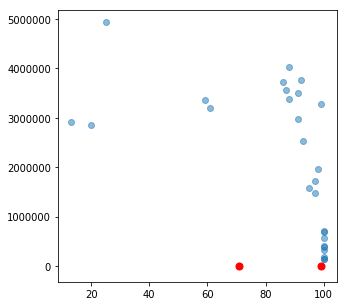

In [10]:
fig = plt.figure(figsize=(5, 5))

colors = map(lambda x: colmap[x+1], labels)


plt.scatter(data['count'], data['var'], alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

plt.show()

In [11]:
#https://www.learndatasci.com/tutorials/k-means-clustering-algorithms-python-intro/
#df=np.array(X,Y)




In [12]:


X = dataplus.iloc[:,0:4]
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['labels'] = stats['label']
dfPCA.head()

,x1,x2,labels
0,-1.906469e+05,1109.374349,BH1
1,1.124512e+06,1558.013436,BH1
2,1.350229e+06,-95.831043,BH1
3,-4.480298e+05,1021.728477,BH1
4,2.771312e+06,-69.901685,BH1


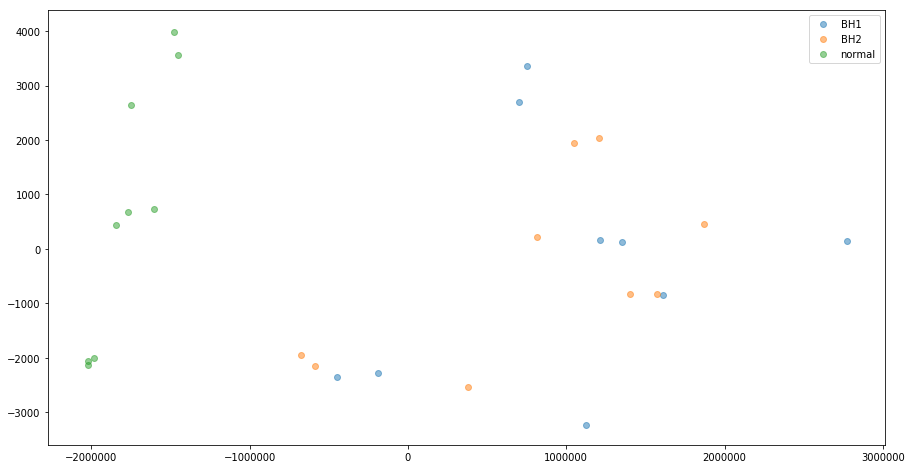

In [13]:
X = data
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['labels'] = stats['label']
dfPCA.head()
labels = stats['label'].unique().tolist()
plt.figure(figsize=(15,8))
for lab in labels:
    #plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=50)
    plt.scatter(dfPCA.loc[dfPCA['labels'] == lab, 'x1'],  dfPCA.loc[dfPCA['labels'] == lab, 'x2'], label=lab, alpha=0.5)
    plt.legend()

Experiment with 3 clusters trying also to find the black Hole node, 0.74% of probability finding a black hole in the network

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataplus)
labels = kmeans.predict(dataplus)
centroids = kmeans.cluster_centers_


print(labels)
print(correction2)


# Performance Metrics
accuracy=sm.accuracy_score(correction2, labels)

# Confusion Matrix
confusionMatrix=sm.confusion_matrix(correction2, labels)

print(accuracy)
print(confusionMatrix)

[2 0 0 2 0 0 0 0 0 2 2 0 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
[0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 1 1 1 1 1 1 1 1 1]
0.7407407407407407
[[11  0  5]
 [ 0  9  0]
 [ 2  0  0]]


In [15]:
for i in range(len(labels)):
    if labels[i]==2:
        labels[i]=0
       
    if correction2[i]==2:
        correction2[i]=0
print(labels)
print(correction2)        
# Performance Metrics
accuracy=sm.accuracy_score(correction2, labels)

# Confusion Matrix
confusionMatrix=sm.confusion_matrix(correction2, labels)

print(accuracy)
print(confusionMatrix)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
1.0
[[18  0]
 [ 0  9]]


## Experiment with Windows 

using windows we can have virtually more data to work with



In [16]:

dataList=coojaJsonImporter("../cooja-9nodes/traces")
data=[]
cases=[
      "BH1",
        "BH2",
    "normal"
      ]

for nodeList in dataList:
    data.append(createNodes(nodeList))
pings=getPings(data)    
d={ "label":[],
    "count":[],
    "std":  [],
    "mean": [],
    "var":  [],
    "25%":  [],
    "50%":[],
    "75%":[],
   "min":[],
   "max":[],
   "hop":[],
   "missing":[]
   #"rtt/pkt":[]
}

window=100
for i in range(len(data)):
    
    for j in range(len(data[i])):
        #n=len(data[i][j].pkts["rtt"])
        n=pings[i]
        #print(n)
        for z in range(0,n,window):
            #print(z)
            
            #df1 = df1.assign(e=p.Series(np.random.randn(sLength)).values)
            node=data[i][j].pkts
            name=str(j)+" "+cases[i]
            nodeWindow=node[(node["pkt"]<z+window) & (node["pkt"]>=z)]["rtt"]
            #current=data[i][j].pkts['rtt'][z:z+window]
            #print(nodeWindow.shape)
            d["count"].append(nodeWindow.count())
            d["std"].append(nodeWindow.std())
            d["mean"].append(nodeWindow.mean())
            d["var"].append(nodeWindow.var())
            d["label"].append(cases[i])
            #print(nodeWindow.describe()["25%"])
            d["25%"].append(nodeWindow.describe()["25%"])
            d["50%"].append(nodeWindow.describe()["50%"])
            d["75%"].append(nodeWindow.describe()["75%"])
            d["min"].append(nodeWindow.describe()["min"])
            d["max"].append(nodeWindow.describe()["max"])
            d["hop"].append(data[i][j].hop)
            
            missing=window-nodeWindow.count()
            d["missing"].append(missing)

stats=pd.DataFrame(d) 

print(stats.head())
print(stats.shape)
stats=stats.dropna()
print(stats.shape)
print(stats.columns)
data=stats.drop(["label","25%","75%","50%","min","max","mean","var"],axis=1)
data.head()

Importing test_1BH_2018-11-09_12_31_25.json
Importing test_1BH_2018-11-09_14_37_46.json
Importing test_nom_2018-11-09_08_55_11.json
  label  count          std         mean           var      25%     50%  \
0   BH1     98  1403.775442  1868.816327  1.970585e+06  1035.75  1404.5   
1   BH1     99  1812.662114  2139.282828  3.285744e+06  1094.00  1430.0   
2   BH1     91  1873.889033  3916.604396  3.511460e+06  2471.00  3067.0   
3   BH1     97  1308.893667  1815.742268  1.713203e+06  1035.00  1313.0   
4   BH1     25  2220.932875  4667.000000  4.932543e+06  3024.00  3943.0   

       75%     min     max  hop  missing  
0  1883.75   498.0  8170.0    1        2  
1  2435.50   615.0  9112.0    1        1  
2  4722.00  1236.0  9972.0    2        9  
3  2029.00   258.0  6985.0    1        3  
4  6051.00  2004.0  9803.0    3       75  
(27, 12)
(27, 12)
Index(['label', 'count', 'std', 'mean', 'var', '25%', '50%', '75%', 'min',
       'max', 'hop', 'missing'],
      dtype='object')


,count,std,hop,missing
0,98,1403.775442,1,2
1,99,1812.662114,1,1
2,91,1873.889033,2,9
3,97,1308.893667,1,3
4,25,2220.932875,3,75


In [17]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_

data.columns
correction=[]
#stats=stats.dropna()

col=np.array(stats["label"])

for i in range(len(col)):
    el=col[i]
    if el=="normal":
        correction.append(0)
      
        
    else:
       
        correction.append(1)
        

correction=np.array(correction)
print(len(correction))
print(len(labels))
#print(labels)
#print(correction)

# Performance Metrics
accuracy=sm.accuracy_score(correction, labels)

# Confusion Matrix
confusionMatrix=sm.confusion_matrix(correction, labels)

print(correction)
print(labels)
print(accuracy)
print(confusionMatrix)

27
27
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
1.0
[[ 9  0]
 [ 0 18]]


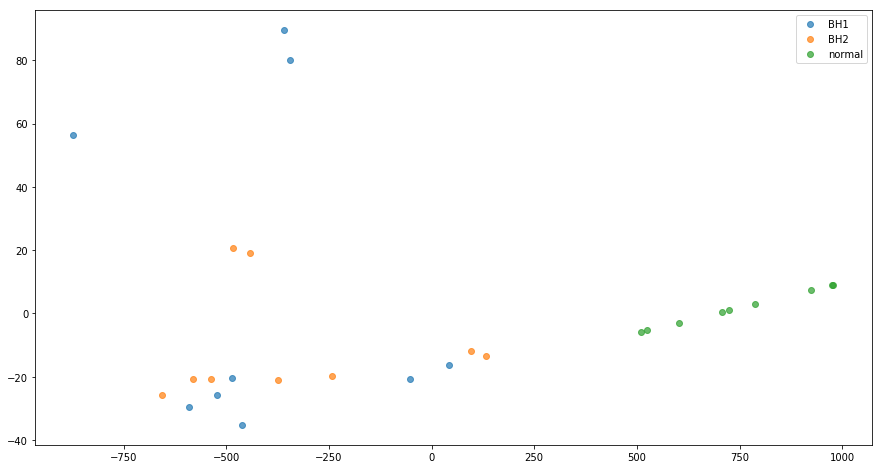

In [18]:
X = data.iloc[:,0:4]
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['labels'] = stats['label']
dfPCA.head()

labels = stats['label'].unique().tolist()
plt.figure(figsize=(15,8))
for lab in labels:
    plt.scatter(dfPCA.loc[dfPCA['labels'] == lab, 'x1'],  dfPCA.loc[dfPCA['labels'] == lab, 'x2'], label=lab, alpha=0.7)
    plt.legend()

Success with a big window we have again 100% success rate, let's try with a smaller one

In [ ]:
## Experiment with smaller windows

In [88]:
dataList=coojaJsonImporter("../cooja-9nodes/traces/")

data=[]
cases=[
      "BH1",
        "BH2",
    
    "normal"
      ]
"""
Importing test_1BH_P8_16nodes_2002019-01-29_21_40_55.json
Importing test_1BH_16nodes2018-11-09_19_46_22.json
Importing test_1BH_P8_16nodes_2002019-01-29_23_27_48.json
Importing test_norm_16nodes_5002019-01-29_18_56_03.json
Importing test_1BH_2018-11-09_12_31_25.json
Importing test_1BH_2018-11-09_14_37_46.json
Importing test_nom_2018-11-09_08_55_11.json
"""



BlackHole=[-1,4,5+8,-1]
#cases=["1BH","1BH","Norm"]
for nodeList in dataList:
    data.append(createNodes(nodeList))
#dataList=coojaJsonImporter("../cooja-9nodes/traces/")
#for nodeList in dataList:
#    data.append(createNodes(nodeList))
    
pings=getPings(data)    
d={ "label":[],
    "count":[],
    "std":  [],
    "mean": [],
    "var":  [],
    "25%":  [],
    "50%":[],
    "75%":[],
   "min":[],
   "max":[],
   "hop":[],
   "missing":[]
   #"rtt/pkt":[]
}

for i in range(len(data)):
    
    for j in range(len(data[i])):
        #n=len(data[i][j].pkts["rtt"])
        n=pings[i]
        #print(n)
        #window=n
        window=50
        
        for z in range(0,n,window):
            node=data[i][j].pkts
            name=str(j)+" "+cases[i]
            nodeWindow=node[(node["pkt"]<z+window) & (node["pkt"]>=z)]["rtt"]
            #current=data[i][j].pkts['rtt'][z:z+window]
            #print(nodeWindow.shape)
            if(nodeWindow.count()<window/2): break
            d["count"].append(nodeWindow.count())
            d["std"].append(nodeWindow.std())
            d["mean"].append(nodeWindow.mean())
            d["var"].append(nodeWindow.var())
            d["label"].append(cases[i])
            #print(nodeWindow.describe()["25%"])
            d["25%"].append(nodeWindow.describe()["25%"])
            d["50%"].append(nodeWindow.describe()["50%"])
            d["75%"].append(nodeWindow.describe()["75%"])
            d["min"].append(nodeWindow.describe()["min"])
            d["max"].append(nodeWindow.describe()["max"])
            d["hop"].append(data[i][j].hop)
            
            missing=window-nodeWindow.count()
            d["missing"].append(missing)

            
#Transforming in dataframe            
stats=pd.DataFrame(d)
print(stats.shape)
stats=stats.dropna()
print(stats.shape)
data=stats.drop(["missing","label","25%","75%","50%","min","max","mean","var"],axis=1)
print(data.head())
###Creating correction Array
correction=[]
#stats=stats.dropna()

col=np.array(stats["label"])

for i in range(len(col)):
    el=col[i]
    if el=="normal":
        correction.append(1)
    else:
        correction.append(0)
correction=np.array(correction)
print(len(correction))
print(len(labels))

####Doing kmeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_
print(data.columns)




accuracy=sm.accuracy_score(correction, labels)

# Confusion Matrix
confusionMatrix=sm.confusion_matrix(correction, labels)

print(correction)
print(labels)
print(accuracy)
print(confusionMatrix)

Importing test_1BH_2018-11-09_12_31_25.json
Importing test_1BH_2018-11-09_14_37_46.json
Importing test_nom_2018-11-09_08_55_11.json
(47, 12)
(47, 12)
   count          std  hop
0     48  1771.238705    1
1     50   910.117928    1
2     49  1942.934293    1
3     50  1694.563007    1
4     41  2068.606934    2
47
47
Index(['count', 'std', 'hop'], dtype='object')
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
[0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
0.8936170212765957
[[24  5]
 [ 0 18]]


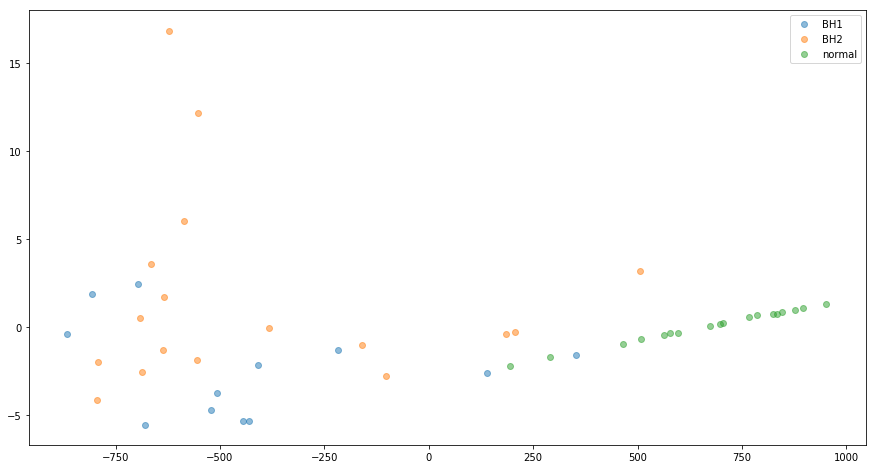

In [89]:
X = data
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['labels'] = stats['label']
dfPCA.head()
labels = stats['label'].unique().tolist()
plt.figure(figsize=(15,8))
for lab in labels:
    #plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=50)
    plt.scatter(dfPCA.loc[dfPCA['labels'] == lab, 'x1'],  dfPCA.loc[dfPCA['labels'] == lab, 'x2'], label=lab, alpha=0.5)
    plt.legend()

Example adding also the 16 nodes, clearly the accuracy goes down as we dont have many data

In [119]:
dataList=coojaJsonImporter("../cooja-16nodes/traces/")

data=[]
cases=[
      "BH1",
        "BH2",
    "BH3",
    "normal"
      ]


"""
Importing test_1BH_P8_16nodes_2002019-01-29_21_40_55.json
Importing test_1BH_16nodes2018-11-09_19_46_22.json
Importing test_1BH_P8_16nodes_2002019-01-29_23_27_48.json
Importing test_norm_16nodes_5002019-01-29_18_56_03.json
Importing test_1BH_2018-11-09_12_31_25.json
Importing test_1BH_2018-11-09_14_37_46.json
Importing test_nom_2018-11-09_08_55_11.json
"""



BlackHole=[-1,4,5+8,-1]
#cases=["1BH","1BH","Norm"]
for nodeList in dataList:
    data.append(createNodes(nodeList))
#dataList=coojaJsonImporter("../cooja-9nodes/traces/")
#for nodeList in dataList:
#    data.append(createNodes(nodeList))
    
pings=getPings(data)    
d={ "label":[],
    "count":[],
    "std":  [],
    "mean": [],
    "var":  [],
    "25%":  [],
    "50%":[],
    "75%":[],
   "min":[],
   "max":[],
   "hop":[],
   "missing":[],
   "blackhole":[]
}

for i in range(len(data)):
    
    for j in range(len(data[i])):
        #n=len(data[i][j].pkts["rtt"])
        n=pings[i]
        #print(n)
        #window=n
        window=80
        
        for z in range(0,n,int(window/5)):
            node=data[i][j].pkts
            name=str(j)+" "+cases[i]
            nodeWindow=node[(node["pkt"]<z+window) & (node["pkt"]>=z)]["rtt"]
            #current=data[i][j].pkts['rtt'][z:z+window]
            #print(nodeWindow.shape)
            if(nodeWindow.count()<window/2): break
            d["label"].append(cases[i])
            d["count"].append(nodeWindow.count())
            missing=window-nodeWindow.count()
            d["missing"].append(missing)
            d["hop"].append(data[i][j].hop)
            d["std"].append(nodeWindow.std())
            d["mean"].append(nodeWindow.mean())
            d["var"].append(nodeWindow.var())
            
            #print(nodeWindow.describe()["25%"])
            d["25%"].append(nodeWindow.describe()["25%"])
            d["50%"].append(nodeWindow.describe()["50%"])
            d["75%"].append(nodeWindow.describe()["75%"])
            d["min"].append(nodeWindow.describe()["min"])
            d["max"].append(nodeWindow.describe()["max"])
            d["blackhole"].append("False")
            
            

            
            
#Transforming in dataframe            
stats=pd.DataFrame(d)
print(stats.shape)
stats=stats.dropna()
print(stats.shape)
data=stats.drop(["blackhole","missing","label","25%","75%","50%","min","max","mean","var"],axis=1)
print(data.head())
###Creating correction Array
correction=[]
#stats=stats.dropna()

col=np.array(stats["label"])

for i in range(len(col)):
    el=col[i]
    if el=="normal":
        correction.append(1)
    else:
        correction.append(0)
correction=np.array(correction)
print(len(correction))
print(len(labels))

####Doing kmeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_
print(data.columns)




accuracy=sm.accuracy_score(correction, labels)

# Confusion Matrix
confusionMatrix=sm.confusion_matrix(correction, labels)

print(correction)
print(labels)
print(accuracy)
print(confusionMatrix)

Importing test_1BH_P8_16nodes_2002019-01-29_21_40_55.json
Importing test_1BH_16nodes2018-11-09_19_46_22.json
Importing test_1BH_P8_16nodes_2002019-01-29_23_27_48.json
Importing test_norm_16nodes_5002019-01-29_18_56_03.json
(344, 13)
(344, 13)
   count          std  hop
0     80   198.933002    3
1     80   219.154292    3
2     80   217.101207    3
3     79   905.836291    3
4     63  1006.600178    3
344
4
Index(['count', 'std', 'hop'], dtype='object')
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 

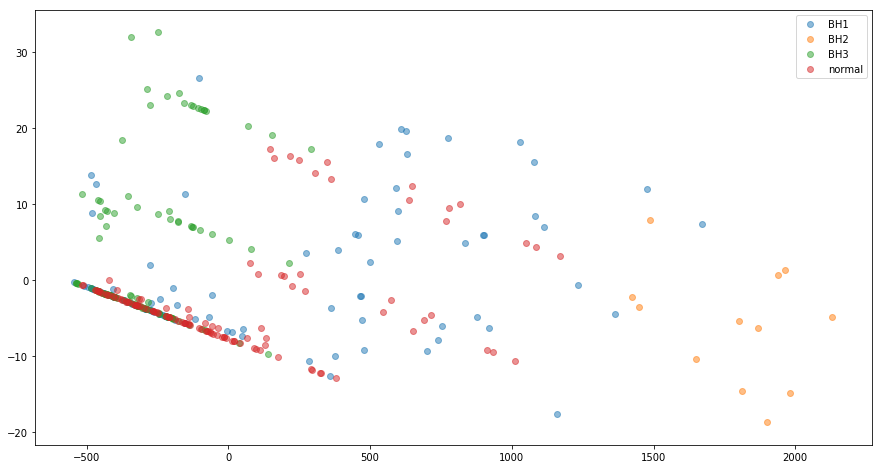

In [120]:
X = data
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['labels'] = stats['label']
dfPCA.head()
labels = stats['label'].unique().tolist()
plt.figure(figsize=(15,8))
for lab in labels:
    #plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=50)
    plt.scatter(dfPCA.loc[dfPCA['labels'] == lab, 'x1'],  dfPCA.loc[dfPCA['labels'] == lab, 'x2'], label=lab, alpha=0.5)
    plt.legend()